In [1]:
# 随机生成训练数据

import numpy as np
import pandas as pd
from sklearn.datasets import make_moons


X, Y = make_moons(n_samples=200, noise=0.05, random_state=2046)
data = np.concatenate((Y.reshape(-1, 1), X), axis=1)
data = pd.DataFrame(data, columns=["y", "x1", "x2"])

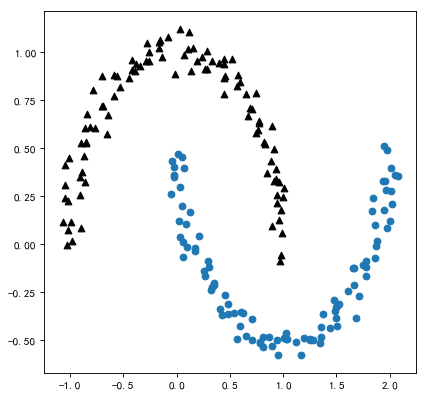

In [3]:
# 将数据可视化

import matplotlib.pyplot as plt


## 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=80)
plt.rcParams["axes.unicode_minus"] = False
## 在图形框里画一幅图
ax = fig.add_subplot(1, 1, 1)
label1 = data[data["y"]>0]
ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
label0 = data[data["y"]==0]
ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
plt.show()

In [4]:
# 使用random forest embedding+伯努利模型对数据建模

from sklearn.ensemble import RandomTreesEmbedding
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline


## 生成模型
pipe = Pipeline(
    [("embedding", RandomTreesEmbedding(random_state=1024)),
     ("model", BernoulliNB())])
## 训练模型
pipe.fit(data[["x1", "x2"]], data["y"])

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('embedding', RandomTreesEmbedding(max_depth=5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           random_state=1024, sparse_output=True, verbose=0,
           warm_start=False)), ('model', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])

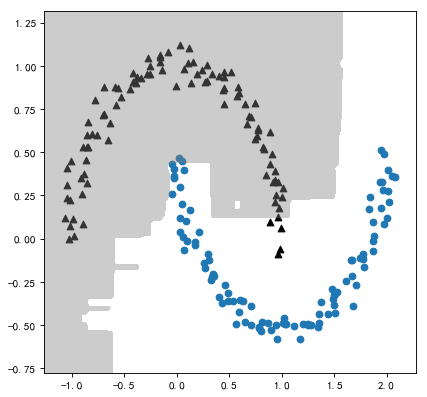

In [5]:
# 将模型的预测结果可视化

## 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=80)
## 在图形框里画一幅图
ax = fig.add_subplot(1, 1, 1)
label1 = data[data["y"]>0]
ax.scatter(label1[["x1"]], label1[["x2"]], marker="o")
label0 = data[data["y"]==0]
ax.scatter(label0[["x1"]], label0[["x2"]], marker="^", color="k")
## 模型结果
x1 = np.linspace(min(data["x1"]) - 0.2, max(data["x1"]) + 0.2, 100)
x2 = np.linspace(min(data["x2"]) - 0.2, max(data["x2"]) + 0.2, 100)
X1, X2 = np.meshgrid(x1, x2)
prob = pipe.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 0]
prob = prob.reshape(X1.shape)
ax.contourf(X1, X2, prob, levels=[0.5, 1], colors=["gray"], alpha=0.4)
plt.show()